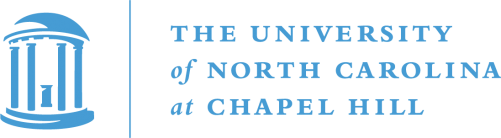


# Notebook 07
**Course:** *Econ 590, Computational Methods for Economists*, [University of North Carolina at Chapel Hill](https://econ.unc.edu/), Spring 2025  
**Instructor:** [Marlon Azinovic-Yang](https://sites.google.com/view/marlonazinovic/home)  
**Contact:** marlonay@unc.edu  
**References:** This notebook has benefited greatly from the teaching material and notebooks generously made available by [Simon Scheidegger](https://sites.google.com/site/simonscheidegger/home), [Felix Kubler](https://sites.google.com/site/fkubler/), [Harold Linh Cole](https://economics.sas.upenn.edu/people/harold-l-cole), [Jeremy Greenwood](https://www.jeremygreenwood.net/), [Jeppe Druedahl](https://sites.google.com/view/jeppe-druedahl/), [Rick Evans](https://sites.google.com/site/rickecon/), and by [Tom Sargent](http://www.tomsargent.com/) and [John Stachurski](https://johnstachurski.net/) on [QuantEcon](https://quantecon.org/).

## Content
The goal of this notebook is to illustrate how we can solve a nonlinear equation using the bisection method. We will apply the method to a model of labor choice and compute optimal labor supply.

## Bisection method
The bisection method can finds a value $x^*$ so that $f(x^*)=0$ for continuous functions $f(\cdot)$. As input the algorithm requires to values $a$ and $b$ such that $f(a)$ and $f(b)$ have opposite signs as well as a desired tolerance level $\epsilon$ such that we are content with an approximate solution $x$ as long as $|x-x^*|<\epsilon$.
### Bisection steps
1. Start with a continuous function $ f(x) $ on an interval $[a, b]$ where $ f(a) \cdot f(b) < 0 $.
2. Compute the midpoint:
   $
   m = \frac{a + b}{2}
   $
3. Evaluate $f(m)$:
   - If $ f(a) \cdot f(m) < 0 $, update the interval to $[a, m]$.
   - Otherwise, update the interval to $[m, b]$.
4. Repeat the process until the interval width $|b - a|$ is less than a specified tolerance $\epsilon$.

This method ensures convergence to a root because the interval shrinks by half at each iteration.

### Implementation
#### Bisection update
**Exercise**: Write a function `bisection_update` that takes as input a function `f`, as well as two points `a`, and `b`. The function should return the updated interval `[anew, bnew]` as described above.

In [1]:
def bisection_update(f, a, b):
    """
    Function implements a single update of the interval in the bisection method.

    Parameters:
    f: function
        The function to find the root of.
    a: float
    b: float
        a and b must be such that f(a) and f(b) have opposite signs.

    Returns:
    anew: float
    bnew: float
        such that f(anew) and f(bnew) have opposite sign.
    """

    # Compute the midpoint of the interval
    m = (a+b) / 2

    # if a and m have opposite signs, the root is in the interval [a, m]
    if f(a) * f(m) < 0:
        bnew = m
        anew = a
    
    # else the root is in the interval [m, b]
    else:
        anew = m
        bnew = b
    
    return anew, bnew


In [2]:
def testfunction(x):
    return x**2 - 2

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
xplotting = np.linspace(0, 3, 100) # 100 points between 0 and 4
yplotting = testfunction(xplotting)


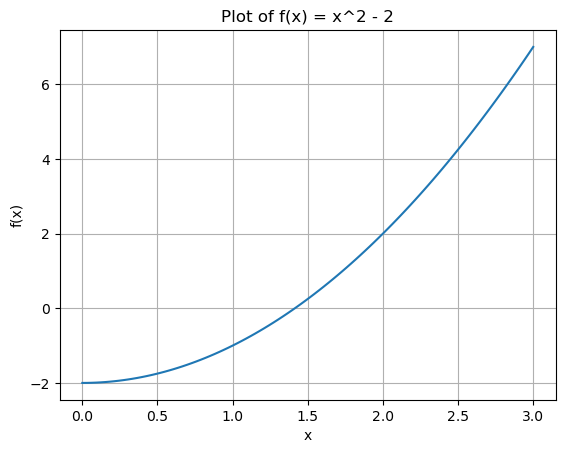

In [5]:

plt.plot(xplotting, yplotting)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^2 - 2')
plt.grid()
plt.show()

In [6]:
atest = 0
btest = 3

Let's try the updating function:

In [7]:
anew, bnew = bisection_update(testfunction, atest, btest)
print("anew = ", anew)
print("bnew = ", bnew)

anew =  0
bnew =  1.5


#### Full bisection method
**Exercise:** Implement a function `bisection_method(f, a, b, tol)`. Where `f` is a continuous function, `a` and `b` are two points such that there is a root in the interval $[a, b]$ and `tol` is the required error tolerance. The function should return a dictionary `soldict` with keys `'success'` and `'sol'`:  
`success`: a boolean that is true of the algorithm completed successfully. If invalid inputs are provided to the function, the function should terminate with `success=False`.  
`sol`: the numerically computed root of f.



In [13]:
def bisection_method(f, a, b, tol=2e-12):
    """
    Function implements the bisection method to find the root of a function.

    Parameters:
    f: function
        The function to find the root of.
    a: float
    b: float
        a and b must be such that f(a) and f(b) have opposite signs.
    tol: float
        The tolerance. The function stops when the length of the interval is less than tol.

    Returns:
    a dictionary with keys 'success' and 'sol'.
    'success': bool
        True if the function converged, False otherwise.
    'sol': float
        The root of the function.
    """

    # Initialize solution dictionary
    soldict = {'success': False, 'sol': (a + b) / 2.}

    # Check if the interval is valid
    if not (f(a) * f(b) < 0):
        print("Invalid interval, f(a) and f(b) need to have opposite signs")
        soldict['success'] = False
        soldict['sol'] = None
        return soldict

    #Update until the intercal converges 
    distance = abs(b - a)

    while distance > tol:
        anew, bnew = bisection_update(f, a, b)

        #assign boundaires and update distance 
        a = anew
        b = bnew
        distance = abs(b - a)


    #Store the results in a dictionary 
    soldict['success'] = True
    soldict['sol'] = (a + b) /2

    return soldict



In [14]:
soldict = bisection_method(testfunction, 0, 3)
print("success = ", soldict['success'])
print("solution = ", soldict['sol'])
print("f(solution) = ", testfunction(soldict['sol']))

success =  True
solution =  1.4142135623726517
f(solution) =  -1.2538858840116518e-12


In [15]:
soldict = bisection_method(testfunction, 0, 1)
print("success = ", soldict['success'])
print("solution = ", soldict['sol'])
print("f(solution) = ", testfunction(soldict['sol']))

Invalid interval, f(a) and f(b) need to have opposite signs
success =  False
solution =  None


TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'int'

As usually the case, there is a Python implementation available already, which we can use

In [11]:
# compare to the one available in python
from scipy.optimize import bisect

? bisect


Signature:
 bisect(
    f,
    a,
    b,
    args=(),
    xtol=2e-12,
    rtol=8.881784197001252e-16,
    maxiter=100,
    full_output=False,
    disp=True,
)
Docstring:
Find root of a function within an interval using bisection.

Basic bisection routine to find a root of the function `f` between the
arguments `a` and `b`. `f(a)` and `f(b)` cannot have the same signs.
Slow but sure.

Parameters
----------
f : function
    Python function returning a number.  `f` must be continuous, and
    f(a) and f(b) must have opposite signs.
a : scalar
    One end of the bracketing interval [a,b].
b : scalar
    The other end of the bracketing interval [a,b].
xtol : number, optional
    The computed root ``x0`` will satisfy ``np.allclose(x, x0,
    atol=xtol, rtol=rtol)``, where ``x`` is the exact root. The
    parameter must be positive.
rtol : number, optional
    The computed root ``x0`` will satisfy ``np.allclose(x, x0,
    atol=xtol, rtol=rtol)``, where ``x`` is the exact root. The
    paramet

In [66]:
sol2 = bisect(testfunction, 0, 3)
print("solution = ", sol2)
print("f(solution) = ", testfunction(sol2))

solution =  1.4142135623719696
f(solution) =  -3.183231456205249e-12


## Labor choice
Consider households choosing how much to work in order to maximize
\begin{align}
\max_h &U(c) - V(h) \\
c &= w h \\
U(c) &= - \frac{1}{c^2}\\
V(h) &= h + h ^ 5
\end{align}
**Exercise**:  
How do the hours worked depend on the wage? Graph the hours worked, consumption, and utility for wages $w\in [1, 10]$.  
*Hint*: The marginal benefit working is given by 
$$wU'(c) = 2 w \frac{1}{c^3} = 2 w \frac{1}{(hw)^3}$$
and the marginal cost of working is given by
$$V'(h) = 1 + 5 h ^ 4 $$
1. Define a function `labor_foc(w, h)` that returns the error in the optimality condition given wages `w` and hours `h`.
2. Define a grid of wages for which you want to solve the equation, you can do this by using `wgrid = np.linspace(1, 10, 100)`.
3. Write a loop that goes through the wages and compute optimal hours, and store the result.
4. Compute the respective consumption and overall utility.
5. Plot the wage against: 1) hours worked 2) consumption 3) obtained

**Solution**:

In [77]:
# 1. Define the functions
#TODO

In [78]:
# 2. choose a grid of wages for which we want to compute hours
#TODO

In [79]:
# 3 a initialize grids to store results
#TODO

In [80]:
# 3 b loop over the grid of wages, compute hours, 4 consumption and utility
#TODO

In [8]:
# 5 create plots
#TODO